## Install requirements

In [ ]:
!python.exe -m pip install --upgrade pip

In [ ]:
%pip install -r requirements-torch-windows.txt -U
%pip install -r requirements.txt -U

## Init stable diffusion

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch

def initdiffusionpipeline(model_id):
    # Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cuda")
    return pipe

#diffusionpipeline=initdiffusionpipeline("stabilityai/stable-diffusion-2-1")
diffusionpipeline=initdiffusionpipeline("dreamlike-art/dreamlike-diffusion-1.0")

In [ ]:
from diffusers import StableDiffusionUpscalePipeline

def initupscalepipeline(model_id):
    pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipeline.enable_attention_slicing() 
    pipeline = pipeline.to("cuda")
    return pipeline

upscalepipeline=initupscalepipeline("stabilityai/stable-diffusion-x4-upscaler")

In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline

def initimg2imgpipeline(model_id):
    pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    return pipe

img2imgpipeline = initimg2imgpipeline("runwayml/stable-diffusion-v1-5")

In [ ]:
def saveimages(images, prompt, seed, postfix=""):
    nbimages = len(images)
    for idx, image in enumerate(images):
        # PIL.Image.Image
        fname = f"images/{prompt.replace(' ','-')}-{seed}-{idx+1}of{nbimages}-{postfix}.png"
        image.save(fname)
        display(image)
        #image.show() # open outside

In [32]:
def generate(prompt,nbimages=1,seed=42):
    images = []
    for i in range(nbimages):
        generator = torch.Generator("cuda").manual_seed(seed+i)
        image = diffusionpipeline(prompt,num_images_per_prompt=1, generator=generator).images[0]
        images.append(image)
    #images = diffusionpipeline(prompt,num_images_per_prompt=nbimages, generator=generator).images
    saveimages(images, prompt, seed)
    return images

In [34]:
def derivate(srcimg, prompt, nbimages=1,seed=42):
    images = []
    for i in range(nbimages):
        generator = torch.Generator("cuda").manual_seed(seed+i)
        image = img2imgpipeline(prompt=prompt, image=srcimg, strength=0.75, guidance_scale=7.5,num_images_per_prompt=1, generator=generator).images[0]
        images.append(image)
    #images = img2imgpipeline(prompt=prompt, image=srcimg, strength=0.75, guidance_scale=7.5,num_images_per_prompt=nbimages, generator=generator).images
    saveimages(images, prompt, seed, "derivation")
    return images

In [ ]:
def upscale(prompt,srcimg,seed=42):
    generator = torch.Generator("cuda").manual_seed(seed)
    upscaled_images = upscalepipeline(prompt=prompt, image=srcimg,generator=generator).images
    saveimages(upscaled_images, prompt, seed, "upscaled")
    return upscaled_images

## Run

100%|██████████| 50/50 [00:14<00:00,  3.38it/s]


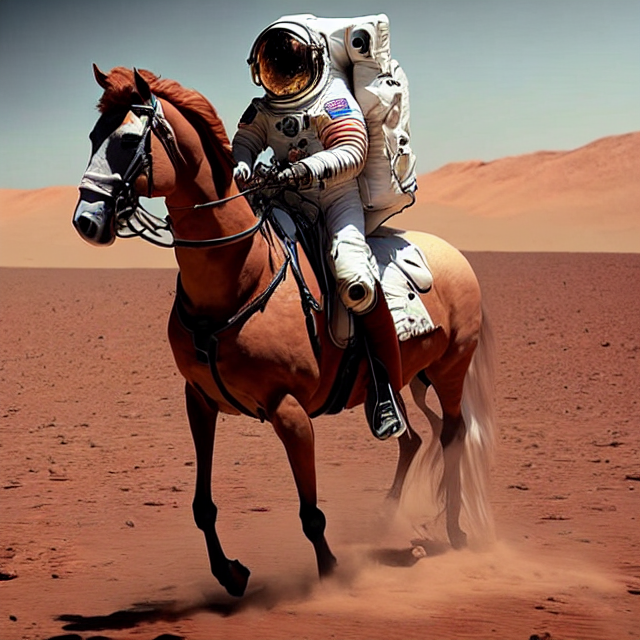

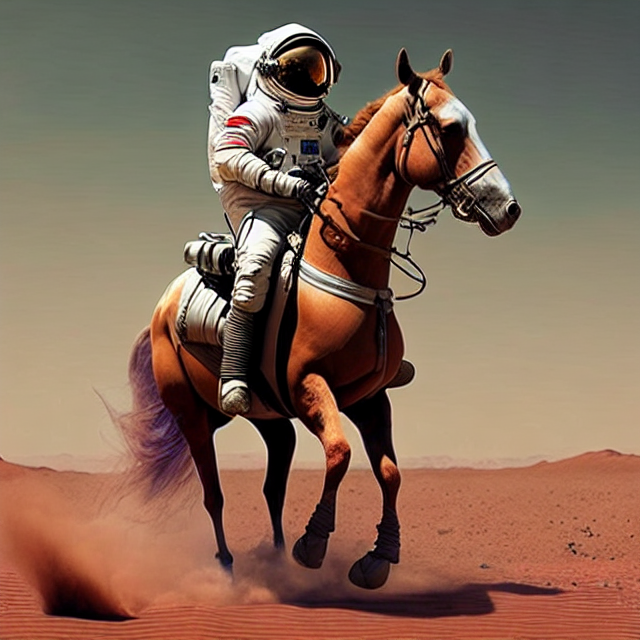

In [33]:
images=generate("a photo of an astronaut riding a horse on mars",2)

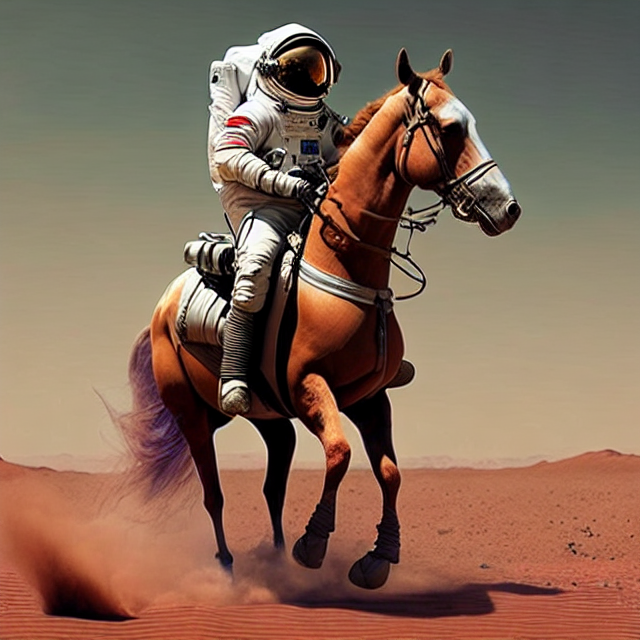

100%|██████████| 37/37 [00:10<00:00,  3.43it/s]


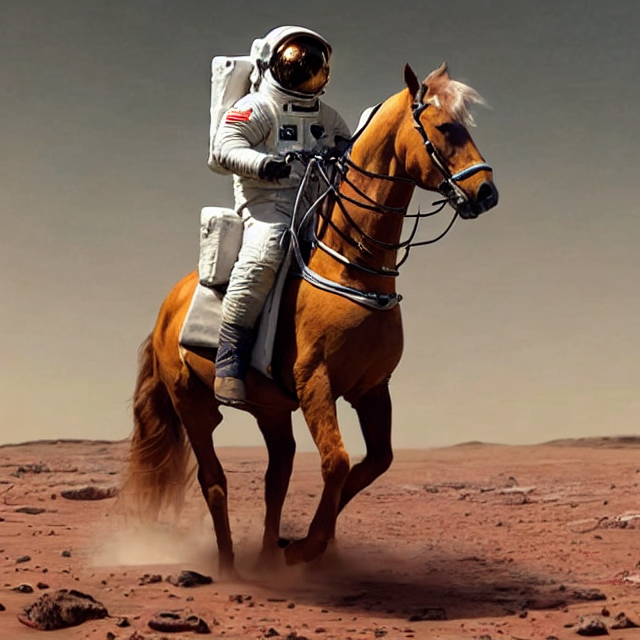

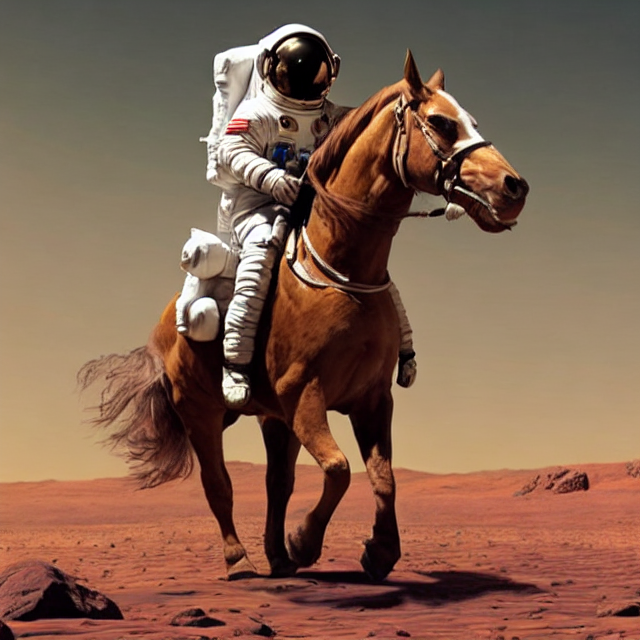

In [35]:
selected = images[1]
display(selected)
imgder=derivate(selected,"a photo of an astronaut riding a horse on mars at night",2)

In [ ]:
# upscale("a photo of an astronaut riding a horse on mars",img)